# Exploring movie data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
DATA_PATH = "../../../data/final_movie_dataset.pkl"
pd.set_option("max_colwidth", None)

In [5]:
DATA_PATH = "../../../data/final_dataset.pkl"
df = pd.read_pickle(DATA_PATH)
#df = df[df['Movie_runtime'] < 200]
#df = df[df['Movie_runtime'] > 30]
df['Movie_name'] = df['Movie_name'].drop_duplicates()

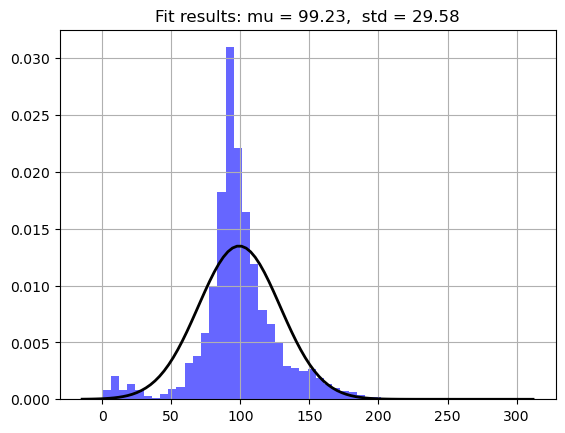

In [6]:
from scipy.stats import norm
run_time = df['Movie_runtime'].dropna()

mu, std = norm.fit(run_time)

_=run_time.hist( bins=50, density=True, alpha=0.6, color='b')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

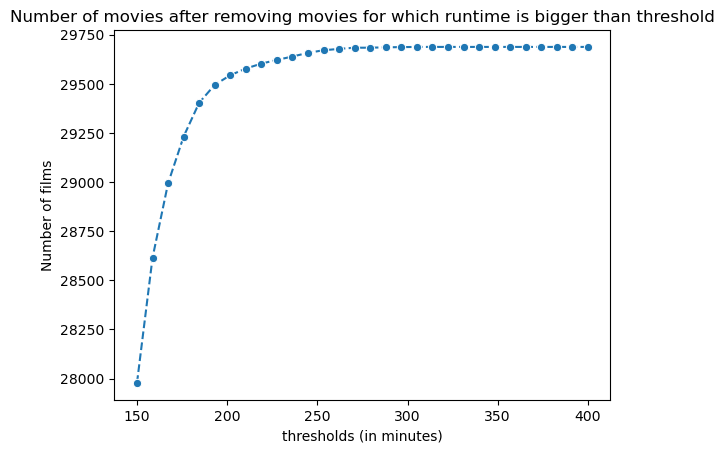

In [7]:
thresholds = np.linspace(150, 400, 30)
arr = []
for t in thresholds:
    num_movie = df[df['Movie_runtime'] < t].shape[0]
    arr.append(num_movie)
sns.lineplot(x = thresholds, y=arr, marker='o', linestyle='--')
plt.ylabel('Number of films')
plt.xlabel('thresholds (in minutes)')
_=plt.title('Number of movies after removing movies for which runtime is bigger than threshold')

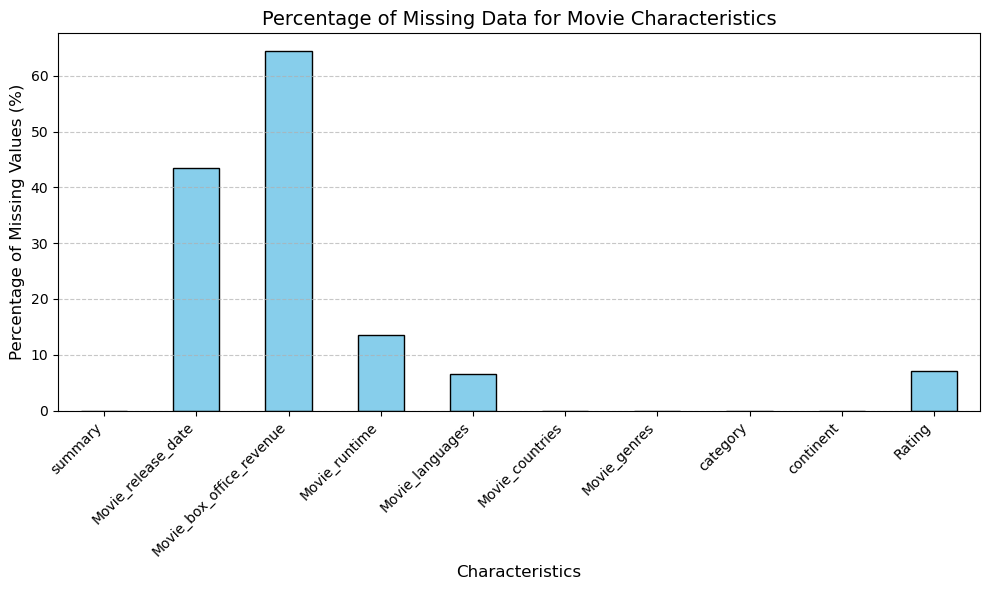

In [8]:
DATA_PATH = "../../../data/final_dataset.pkl"
df_movie = pd.read_pickle(DATA_PATH)

# Calculate the percentage of missing values
missing_percentage = df_movie.isna().sum() / len(df_movie) * 100

# Drop the first, third, and fourth columns
columns_to_exclude = ['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_name']
filtered_missing_percentage = missing_percentage.drop(columns_to_exclude)

# Plot the filtered missing values as a bar chart
plt.figure(figsize=(10, 6))
filtered_missing_percentage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage of Missing Data for Movie Characteristics', fontsize=14)
plt.xlabel('Characteristics', fontsize=12)
plt.ylabel('Percentage of Missing Values (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [10]:
df_movie.describe()


,Wikipedia_movie_ID,Movie_release_date,Movie_runtime,Rating
count,3.434200e+04,19415.000000,29688.000000,31886.000000
mean,1.332942e+07,1982.587020,99.231158,6.261792
std,1.058104e+07,26.947072,29.585024,1.137202
min,3.333000e+03,1896.000000,0.416667,1.000000
25%,3.723278e+06,1962.000000,87.000000,5.600000
50%,1.084950e+07,1993.000000,96.000000,6.400000
75%,2.203643e+07,2005.000000,111.000000,7.000000
max,3.737388e+07,2016.000000,297.000000,9.900000


## Movie plots

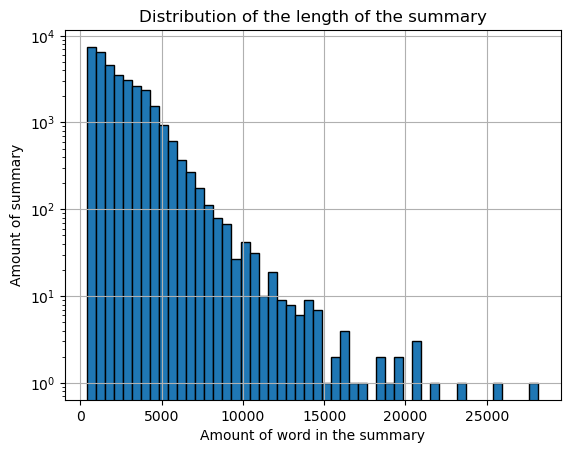

In [11]:
df_plot_length = df_movie["summary"].dropna().apply(len) 
df_plot_length.hist(bins=50, edgecolor='black')
plt.yscale('log')
plt.xlabel('Amount of word in the summary')
plt.ylabel('Amount of summary')
plt.title('Distribution of the length of the summary');

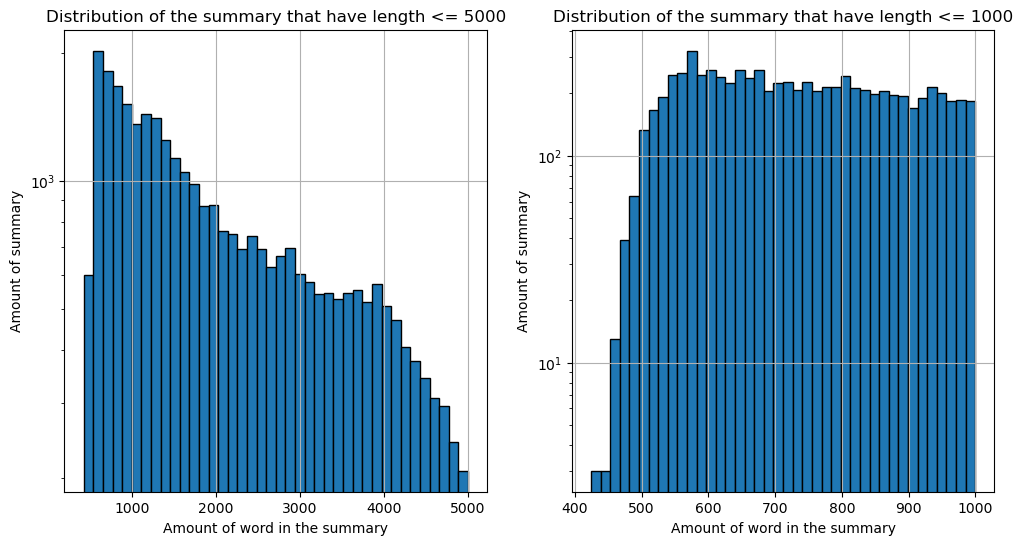

In [12]:
_, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.ravel()

df_length_summary_below_5000 = df_plot_length[df_plot_length <= 5000]
df_length_summary_below_5000.hist(bins=40, edgecolor='black', ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_xlabel('Amount of word in the summary')
axes[0].set_ylabel('Amount of summary')
axes[0].set_title('Distribution of the summary that have length <= 5000');


df_length_summary_below_1000 = df_plot_length[df_plot_length <= 1000]
df_length_summary_below_1000.hist(bins=40, edgecolor='black', ax=axes[1])
axes[1].set_yscale('log')
axes[1].set_xlabel('Amount of word in the summary')
axes[1].set_ylabel('Amount of summary')
axes[1].set_title('Distribution of the summary that have length <= 1000');

Explanation of our choices for which plots to retrieve from wikipedia

## Movie genres

In [13]:
df_genre = df_movie[["Wikipedia_movie_ID", "Movie_genres", 'category']].copy()
df_genre["Movie_genres"] = df_movie["Movie_genres"].str.split(", ").to_frame()
df_genre = df_genre.explode('category')
df_genre.dropna(inplace=True)
df_genre.sample(2)

,Wikipedia_movie_ID,Movie_genres,category
13834,6613804,"[Crime Fiction, Indie, Prison film, Action/Adventure, Martial Arts Film, Action, Prison]",Thriller
1625,434542,"[Crime Fiction, Romantic drama, Romance Film, Drama]",Drama


In [14]:
df_genre.drop_duplicates(subset='Wikipedia_movie_ID')

,Wikipedia_movie_ID,Movie_genres,category
1,3333,"[Silent film, Indie, Costume drama, Epic, Black-and-white, Drama, War film]",Action/Adventure
2,3746,"[Thriller, Cyberpunk, Science Fiction, Future noir, Existentialism, Cult, Drama, Film noir, Crime Thriller, Chinese Movies, Dystopia, Neo-noir]",Drama
3,3837,"[Western, Satire, Comedy]",Action/Adventure
4,3947,"[Thriller, Mystery, Crime Fiction]",Thriller
5,4227,"[Costume drama, Film adaptation, Period piece, Drama, War film, Romance Film, New Hollywood]",Drama
...,...,...,...
42710,37176066,"[Sports, Comedy film, Drama]",Comedy
42711,37210334,"[Comedy film, Drama]",Comedy
42712,37241569,[Action],Action/Adventure
42713,37257312,[Comedy film],Comedy


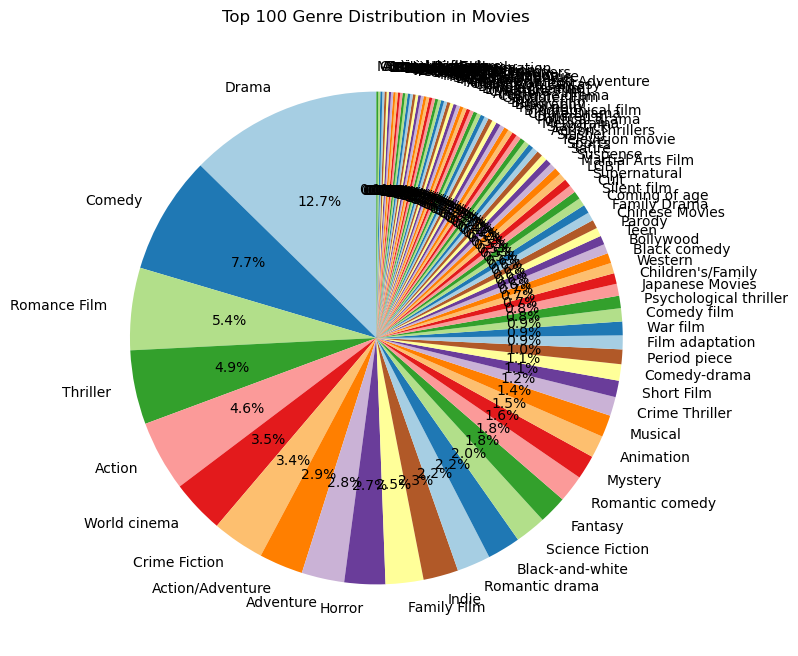

In [51]:
# Flatten the list of genres and get unique genre counts
all_genres = [genre for genres in df_genre['Movie_genres'] for genre in genres]
unique_genre, counts_genre = np.unique(all_genres, return_counts=True)

# Get the top 100 genres by count
top_100_indices = np.argsort(counts_genre)[::-1][:100]
top_100_genres = unique_genre[top_100_indices]
top_100_counts = counts_genre[top_100_indices]

# Create the pie chart for the top 100 genres
plt.figure(figsize=(10, 8))
plt.pie(top_100_counts, labels=top_100_genres, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Top 100 Genre Distribution in Movies')

# Display the pie chart
plt.show()


Given the incredible amount of different genre, we have to come up with a classification, the pie chart can help us in deciding what categories should be

In [52]:
genre_mapping = {
    'Action/Adventure': [
        'Action', 'Action Comedy', 'Action Thrillers', 'Action/Adventure', 
        'Martial Arts Film', 'Samurai cinema', 'Adventure', 'Adventure Comedy',
        'Swashbuckler films', 'Costume Adventure', 'Western', 'Hybrid Western', 'Epic', 'Epic Western', 
        'Family-Oriented Adventure', 'Historical Epic', 'Indian Western', 'Spaghetti Western', 'Revisionist Western',
        'Escape Film', 'Glamorized Spy Film', 'Prison escape', 'Movies About Gladiators'
    ],
    'Comedy': [
        'Comedy', 'Comdedy', 'Comedy Thriller', 'Comedy Western', 'Comedy film', 
        'Comedy horror', 'Comedy of Errors', 'Comedy of manners', 'Comedy-drama', 
        'Workplace Comedy', 'Stand-up comedy', 'Screwball comedy',
        'Parody', 'Slapstick', 'Gross out', 'Gross-out film', 'Black comedy', 
        'Sex comedy', 'Farce', 'Satire', 'Dark comedy', 'Camp', 'Domestic Comedy', 
        'Courtroom Comedy', 'Horror Comedy', 'Humour', 'Beach Party film', 
        'Buddy Picture', 'Buddy film', 'Heavenly Comedy', 'Media Satire', 'Ealing Comedies'
    ],
    'Drama': [
        'Drama', 'Addiction Drama', 'Childhood Drama', 'Courtroom Drama', 
        'Historical drama', 'Inspirational Drama', 'Marriage Drama', 
        'Medical fiction', 'Melodrama', 'Psychological drama', 
        'Tragicomedy', 'Political drama', 'Prison film', 'Family Drama', 'Legal drama', 
        'Family & Personal Relationships', 'Social problem film', 'Interpersonal Relationships',
        'Social issues', 'Illnesses & Disabilities', 'Existentialism', 'Costume drama', 'Prison', 'Tragedy'
    ],
    'Fantasy/Sci-Fi': [
        'Fantasy', 'Fantasy Adventure', 'Fantasy Comedy', 'Fantasy Drama', 
        'Mythological Fantasy', 'Sword and Sorcery', 'Sword and sorcery films', 
        'Fairy tale', 'Supernatural', 'Surrealism', 'Absurdism', 'Magic Realism',
        'Sci-Fi', 'Sci-Fi Adventure', 'Sci-Fi Thriller', 
        'Science Fiction', 'Space opera', 'Future noir', 'Space western', 'Cyberpunk', 
        'Alien invasion', 'Alien Film', 'Dystopia', 'Utopia', 'Time travel', 
        'Steampunk', 'Post-apocalyptic', 'Robots', 'Science fiction Western', 'Punk rock', 
        'Revisionist Fairy Tale', 'Sci Fi Pictures original films', 'Apocalyptic and post-apocalyptic fiction'
    ],
    'Horror': [
        'Horror', 'Psychological horror', 'Natural horror films', 
        'Monster movie', 'Slasher', 'Splatter film', 'Zombie Film', 'Vampire movies', 
        'Werewolf fiction', 'Creature Film', 'Body Horror', 'Ghost Story', 
        'Demonic child', 'Gothic Film', 
        'Supernatural Horror', 'Sci-Fi Horror', 'Costume Horror', 'Period Horror', 'Road-Horror', 
        'Haunted House Film', 'Sexploitation', 'Softcore Porn', 
        'Doomsday film', 'Monster', 'Plague'
    ],
    'Romance': [
        'Romance', 'Romantic comedy', 'Romantic drama', 'Romantic fantasy', 
        'Romantic thriller', 'Love Story', 'Erotic Drama', 'Erotic thriller', 
        'Romance Film', 'Coming-of-age film', 'Chick flick', 'Erotica'
    ],
    'Thriller': [
        'Thriller', 'Political thriller', 'Psychological thriller', 
        'Crime Thriller', 'Mystery', 'Spy', 'Suspense', 'Whodunit', 'Conspiracy fiction', 
        'Detective', 'Chase Movie', 'Crime Fiction', 'Gangster Film', 'Master Criminal Films', 
        'Detective fiction', 'Political satire', 'Law & Crime', 'Gangster', 
        'Buddy cop'
    ],
    'Documentary': [
        'Documentary', 'Docudrama', 'Historical Documentaries', 
        'Political Documetary', 'Nature', 'True Crime', 'Music Documentary', 
        'Science Documentary', 'Sports Documentary', 'Cultural Documentary', 
        'Education', 'Anthropology', 'History', 'Environmental Science', 'Animals',
        'Archives and records', 'Culture & Society', 'Educational', 'Graphic & Applied Arts', 
        'Health & Fitness', 'Inventions & Innovations', 'Language & Literature', 'Journalism', 
        'Libraries and librarians', 'Linguistics', 'Media Studies', 'Political cinema', 'Rockumentary',
        'Archaeology', 'Travel', 'World History'
    ],
    'Family/Animation': [
        'Animation', 'Animated cartoon', 'Anime', 'Computer Animation', 
        'Clay animation', 'Silhouette animation', 'Animated Musical', 
        'Stop motion', 'Supermarionation', 'Live action', 'Children\'s', 'Children\'s Fantasy', 
        'Family Film', 'Children\'s Entertainment', "Children's Issues", "Children's/Family",
        'Christmas movie'
    ],
    'Musical': [
        'Musical', 'Musical Drama', 'Musical comedy', 'Jukebox musical', 
        'Film-Opera', 'Operetta', 'Backstage Musical', 'Concert film', 
        'Singing cowboy', 'Dance', 'Instrumental Music', 'Music'
    ],
    'War/Crime': [
        'War film', 'Combat Films', 'Military', 'Anti-war film', 'World War II', 
        'Gulf War', 'Crime', 'Crime Comedy', 'Crime Drama',
        'Heist', 'Police Procedural',  'Juvenile Delinquency Film', 'Cold War',
        'War effort', 'Revenge', 'Outlaw biker film', 'Outlaw', 'Patriotic film',
        'Private military company', 'Cavalry Film', 'British Empire Film'
    ],
    'Sports': [
        'Sports', 'Boxing', 'Baseball', 'Basketball', 'Football', 'Soccer', 
        'Auto racing', 'Horse racing', 'Extreme Sports', 'Parkour in popular culture', 
        'Breakdance'
    ],
    'LGBTQ+': [
        'LGBT', 'Gay', 'Gay Interest', 'Gay Themed', 'Homoeroticism', 
        'Queer Cinema', 'New Queer Cinema', 'Gay pornography', 'Pornographic movie', 
        'Pinku eiga', 'Pornography', 'Feminist Film'
    ],
    'Others': [
        'B-Movie', 'Mockumentary', 'Mondo film', 'Cult', 'Art film', 'Film Noir', 
        'New Wave', 'Czechoslovak New Wave', 'Kitchen sink realism', 'Neo-noir', 
        'Blaxploitation', 'Bollywood', 'World cinema', 'Z movie', 'Experimental film', 'Avant-garde',
        'Expressionism', 'Essay Film', 'Abstract', 'Structural Film', 'Americana', 'Coming of age', 'Biographical film',
        'Biography', 'Historical fiction', 'Period piece', 'Biker Film', 'B-Western', 'B-movie', 'C-Movie', 
        'Caper story', 'Feature film', 'Fictional film', 'Filipino', 'Filipino Movies', 'Film', 'Film adaptation',
        'Film noir', 'Film à clef', 'Filmed Play', 'Finance & Investing', 'Foreign legion', 'Gender Issues',
        'Giallo', 'Goat gland', 'Hardcore pornography', 'Heaven-Can-Wait Fantasies', 'Hip hop movies', 'Holiday Film',
        'Exploitation', 'Fan film', 'Female buddy film', 'Film & Television History', 'Film serial', 'Horror comedy',
        'Mumblecore', 'Neorealism', 'News', 'Ninja movie', 'Northern', 'Nuclear warfare', 'Point of view shot',
        'Pre-Code', 'Psycho-biddy', 'Race movie', 'Reboot', 'Remake', 'Road movie', 'Roadshow theatrical release',
        'School story', 'Short Film', 'Silent film', 'Slice of life story', 'Sponsored film', 'Star vehicle', 
        'Statutory rape', 'Stoner film', 'Superhero', 'Superhero movie', 'Sword and Sandal', 'Sword and sorcery',
        'Tamil cinema', 'Teen', 'Television movie', 'The Netherlands in World War II', 'Theremin music', 'Therimin music',
        'Acid western', 'Adult', 'Airplanes and airports', 'Albino bias', 'Animal Picture', 'Anthology', 'Anti-war',
        'Beach Film', 'Bengali Cinema', 'Biopic [feature]', 'Black-and-white', 'Bloopers & Candid Camera',
        'British New Wave', 'Bruceploitation', 'Business', 'Chinese Movies', 'Computers', 'Disaster', 'Dogme 95',
        'Early Black Cinema', 'Ensemble Film', 'Indie', 'Japanese Movies', 'Jungle Film', 'Kafkaesque', 'Latino',
        'Malayalam Cinema', 'Movie serial', 'New Hollywood', 'Roadshow/Carny', 'Tokusatsu', 'Tollywood',
        'Women in prison films', 'Wuxia', 'Natural disaster', 'Christian film', 'Religious Film', 'Hagiography', 'Propaganda film', 
        'Spirituality', 'Biblical Film'
    ]
}


In [16]:
def check_genres_in_mapping(genre_mapping, genre_list):
    # Collect all genres from the genre_mapping
    all_genres = [genre for genres in genre_mapping.values() for genre in genres]
    
    # Check if all genres in the genre_list are present in the genre_mapping
    missing_genres = [genre for genre in genre_list if genre not in all_genres]
    
    if missing_genres:
        print("Missing genres:")
        for genre in missing_genres:
            print(genre)
    else:
        print("All genres from the list are present in the genre mapping.")

check_genres_in_mapping(genre_mapping, unique_genre)

NameError: name 'genre_mapping' is not defined

In [55]:
def recategorize_genre(genre_mapping, genre_list):
    new_genre_set = set()
    for genre in genre_list:
        for category, genres in genre_mapping.items():
            if genre in genres:
                new_genre_set.add(category)
    return list(new_genre_set)

df_genre['category_2'] = df_genre['Movie_genres'].apply(lambda genres: recategorize_genre(genre_mapping, genres))

In [56]:
df_genre.sample(5)

,Wikipedia_movie_ID,Movie_genres,category,category_2
27159,18876023,"[Children's/Family, Fantasy, Adventure, Children's Fantasy, Sword and sorcery films]",Action/Adventure,"[Fantasy/Sci-Fi, Action/Adventure, Family/Animation]"
28767,20344625,"[Japanese Movies, Horror, World cinema]",Horror,"[Horror, Others]"
2916,939519,"[Alien Film, Science Fiction, Comedy, Animation]",Fantasy/Sci-Fi,"[Fantasy/Sci-Fi, Family/Animation, Comedy]"
4612,1629388,"[Silent film, Melodrama, Comedy-drama, Comedy, Black-and-white]",Drama,"[Drama, Comedy, Others]"
10516,4485137,"[Family Film, Adventure, Comedy]",Action/Adventure,"[Action/Adventure, Family/Animation, Comedy]"


This dataframe can now be linked to the sentiment analysis

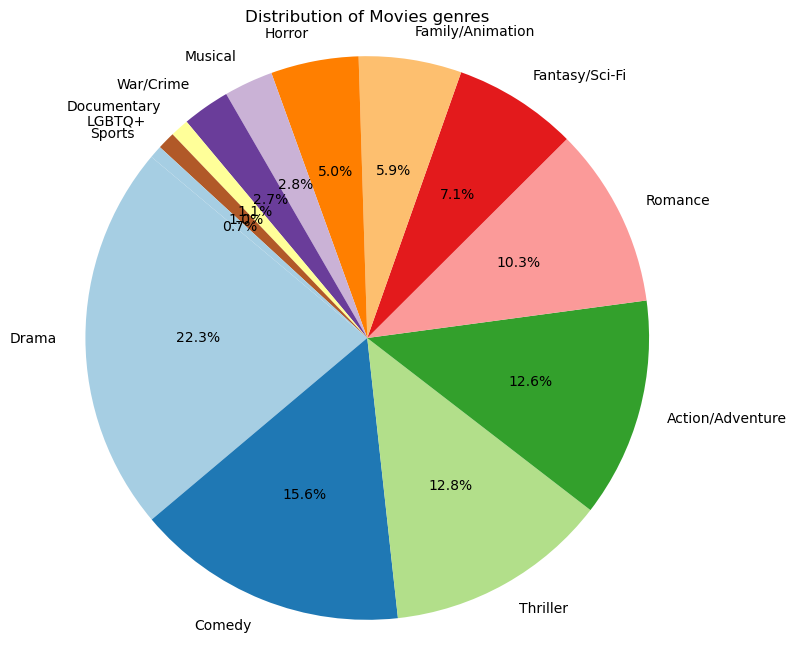

In [57]:
genre_counts = df_genre['category_2'].explode().value_counts()
genre_counts_filtered = genre_counts[genre_counts.index != 'Others']

plt.figure(figsize=(8, 8))
plt.pie(genre_counts_filtered, labels=genre_counts_filtered.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Movies genres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

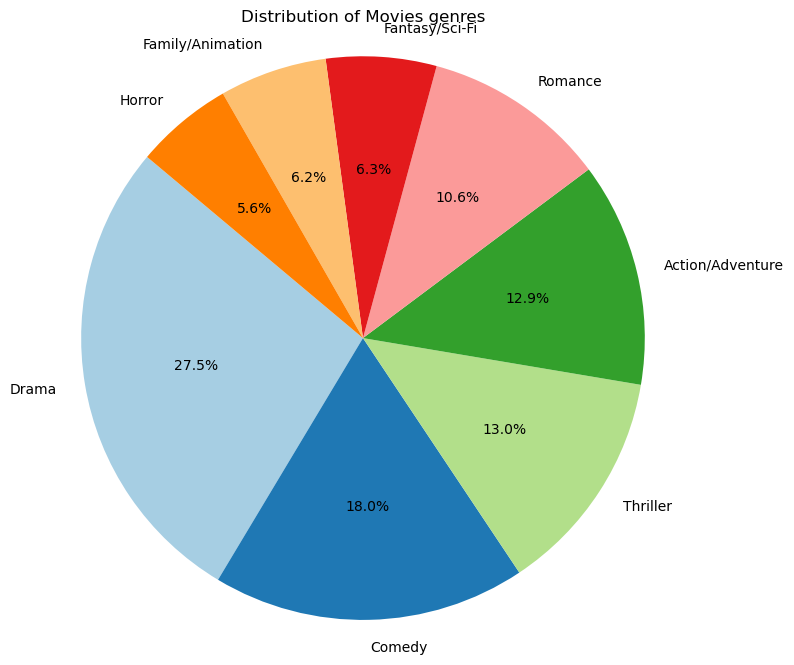

In [58]:
genre_counts = df_genre['category'].value_counts()
genre_counts_filtered = genre_counts[genre_counts.index != 'Others']

plt.figure(figsize=(8, 8))
plt.pie(genre_counts_filtered, labels=genre_counts_filtered.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Movies genres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

One question stays : do we allow a film to have multiple genre or do we keep only one ?

## Box office, release date and countries

### Box office and release date

In [59]:
df_movie.isna().sum() / len(df_movie) * 100

Wikipedia_movie_ID           0.000000
summary                      0.000000
Freebase_movie_ID            0.000000
Movie_name                   0.000000
Movie_release_date          43.465727
Movie_box_office_revenue    64.387630
Movie_runtime               13.551919
Movie_languages              6.642013
Movie_countries              0.000000
Movie_genres                 0.000000
category                     0.000000
continent                    0.000000
Rating                       7.151593
dtype: float64

As we have seen before, box office would clearly need to be increased via scraping since 90% of the information does not exist, in our analysis we probably will not need runtime and languages so we refrain from exploring it. Also plots will be scraped as they are the center of our analysis. If we extend our analysis through time periods, we may also want to scrape release years.

In [68]:
import plotly.express as px

# Calculate the decade and count movies per decade
df_movie['decade'] = (df_movie['Movie_release_date'].dropna().astype(int) // 10) * 10
decade_counts = df_movie['decade'].value_counts().sort_index()

# Create a bar chart using Plotly
fig = px.bar(
    x=decade_counts.index, 
    y=decade_counts.values, 
    labels={'x': 'Decade', 'y': 'Number of Movies'},
    title='Number of Movies per Decade',
    color_discrete_sequence=['skyblue']
)

# Customize the layout to show only decade labels
fig.update_layout(
    xaxis_title="Decade",
    yaxis_title="Number of Movies",
    xaxis=dict(
        tickmode='array',  # Explicitly set tick values
        tickvals=decade_counts.index,  # Set tick values to the decades
        ticktext=[str(int(decade)) for decade in decade_counts.index],  # Use decade labels as tick text
        tickangle=45  # Rotate labels for better readability
    )
)

# Save and display the chart
fig.write_html("plot/dataset_presentation/number_of_movies_per_decade.html")
fig.show()


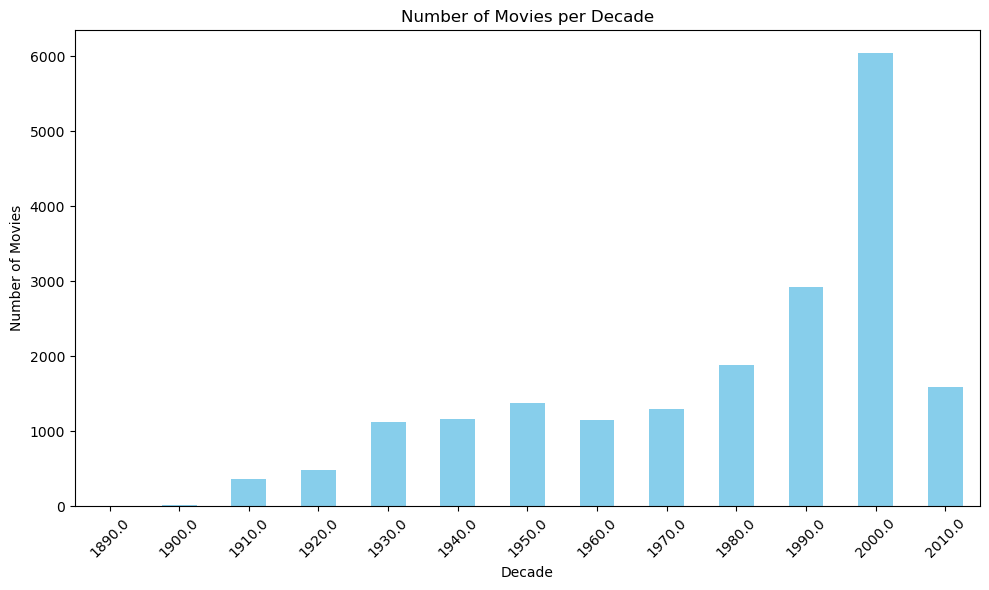

In [60]:
df_movie['decade'] = (df_movie['Movie_release_date'].dropna().astype(int) // 10) * 10
decade_counts = df_movie['decade'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
decade_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
"""mean_box_office_by_decade = df_movie.groupby('decade')['Movie_box_office_revenue'].mean()

plt.figure(figsize=(10, 6))
plt.bar(mean_box_office_by_decade.index.astype(str), mean_box_office_by_decade.values, color='skyblue')
plt.title('Mean Box Office Earnings by Decade')
plt.xlabel('Decade')
plt.ylabel('Mean Box Office Earnings (in USD)')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()"""

"mean_box_office_by_decade = df_movie.groupby('decade')['Movie_box_office_revenue'].mean()\n\nplt.figure(figsize=(10, 6))\nplt.bar(mean_box_office_by_decade.index.astype(str), mean_box_office_by_decade.values, color='skyblue')\nplt.title('Mean Box Office Earnings by Decade')\nplt.xlabel('Decade')\nplt.ylabel('Mean Box Office Earnings (in USD)')\nplt.xticks(rotation=45)\nplt.tight_layout()\n\n# Display the plot\nplt.show()"

We observe the mean box office tends to increase with the decades

### Countries representation

In [18]:
df_countries = df_movie[["Wikipedia_movie_ID", "Movie_countries"]].copy()
df_countries["Movie_countries"] = df_movie["Movie_countries"].str.split(", ").to_frame()
df_countries.dropna(inplace=True)

In [19]:
all_countries = [c for cs in df_countries['Movie_countries'] for c in cs]
unique_country, counts_country = np.unique(all_countries, return_counts=True)
print(len(unique_country))
print(list(unique_country))

139
['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belgium', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burma', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Czech Republic', 'Czechoslovakia', 'Democratic Republic of the Congo', 'Denmark', 'Egypt', 'England', 'Estonia', 'Ethiopia', 'Federal Republic of Yugoslavia', 'Finland', 'France', 'Georgia', 'Georgian SSR', 'German Democratic Republic', 'German Language', 'Germany', 'Greece', 'Guinea', 'Guinea-Bissau', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Kingdom of Great Britain', 'Kingdom of Italy', 'Korea', 'Kuwait', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg', 'Macau', 'Malayalam Language', 'Malaysia', 'Mali', 'Malta', 'Mandatory Pale

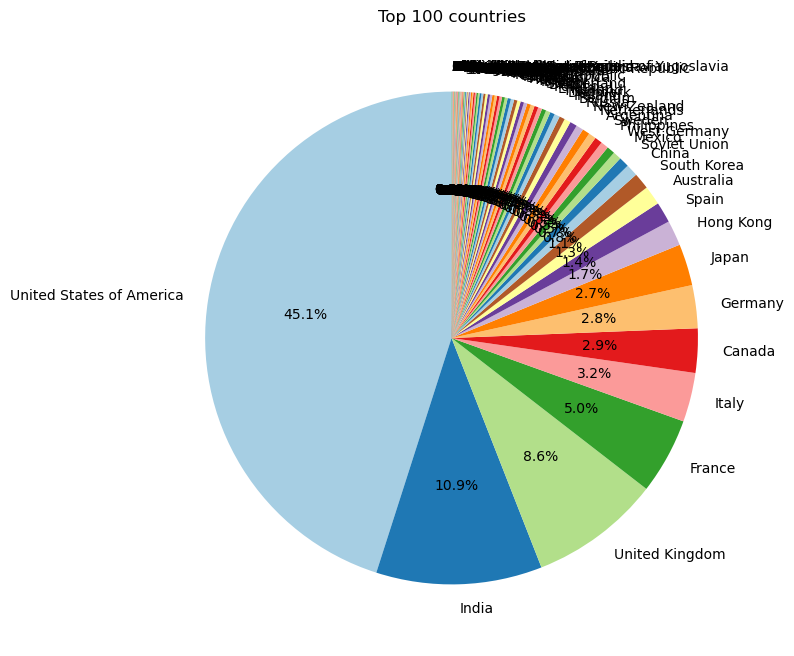

In [20]:
# Get the top 100 genres by count
top_100_indices = np.argsort(counts_country)[::-1][:100]
top_100_countries = unique_country[top_100_indices]
top_100_counts = counts_country[top_100_indices]

# Create the pie chart for the top 100 genres
plt.figure(figsize=(10, 8))
plt.pie(top_100_counts, labels=top_100_countries, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Top 100 countries')

# Display the pie chart
plt.show()

In [21]:
country_mapping = {
    'Asia': [
        'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 
        'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Lebanon', 'Malaysia', 
        'Maldives', 'Mongolia', 'Myanmar (Burma)', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestinian Territories', 'Philippines', 
        'Qatar', 'Republic of China (Taiwan)', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 
        'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen',
        "Burma", "Georgian SSR", "Hong Kong", "Iraqi Kurdistan", "Korea", "Macau", "Mandatory Palestine",
        "Palestinian territories", "Republic of China", "Taiwan", "Uzbek SSR", "Soviet Union", "Malayalam Language"
    ],
    'Africa': [
        'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 
        'Comoros', 'Congo', 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 
        'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast (Côte d\'Ivoire)', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 
        'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 
        'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'
    ],
    'Europe': [
        'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 
        'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 
        'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 
        'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 
        'Ukraine', 'United Kingdom', "Crime", "Czechoslovakia", "England", "Federal Republic of Yugoslavia", "German Democratic Republic",
        "Isle of Man", "Kingdom of Great Britain", "Kingdom of Italy", "Northern Ireland",
        "Republic of Macedonia", "Scotland", "Serbia and Montenegro", "Slovak Republic",
        "Socialist Federal Republic of Yugoslavia", "Soviet occupation zone", "Ukrainian SSR", "Ukranian SSR",
        "Wales", "Weimar Republic", "West Germany", "Yugoslavia", "German Language", "Nazi Germany"
    ],
    'North America': [
        'Canada', 'Costa Rica', 'Cuba', 'Dominican Republic', 'El Salvador', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 
        'Nicaragua', 'Panama', 'United States of America', "Aruba", "Bahamas", "Puerto Rico"
    ],
    'South America': [
        'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'
    ],
    'Oceania': [
        'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 
        'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'
    ]
}

In [22]:
def check_countries_in_mapping(country_mapping, country_list):
    # Collect all genres from the genre_mapping
    all_countries = [c for cs in df_countries['Movie_countries'] for c in cs]

    # Check if all genres in the genre_list are present in the genre_mapping
    missing_countries = [c for c in country_list if c not in all_countries]
    
    if missing_countries:
        print("Missing genres:")
        for c in missing_countries:
            print(c)
    else:
        print("All countries from the list are present in the country mapping.")

check_countries_in_mapping(country_mapping, unique_country)

All countries from the list are present in the country mapping.


In [23]:
def recategorize_countries(country_list, country_mapping):
    new_continent = set()  
    for genre in country_list:
        for category, genres in country_mapping.items():
            if genre in genres:
                new_continent.add(category) 
    return list(new_continent) 

df_countries['continent'] = df_countries['Movie_countries'].apply(lambda c: recategorize_countries(c, country_mapping)[0])
df_countries.sample(2)

,Wikipedia_movie_ID,Movie_countries,continent
32022,23691120,[United States of America],North America
1110,226842,"[France, United States of America, Netherlands]",Europe


In [24]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# First plot: Pie chart
continent_counts = df_countries['continent'].explode().value_counts()

# Define a custom color palette similar to 'Paired'
custom_colors = [
    "#a6cee3", "#1f78b4", "#b2df8a", "#33a02c", 
    "#fb9a99", "#e31a1c", "#fdbf6f", "#ff7f00", 
    "#cab2d6", "#6a3d9a", "#ffff99", "#b15928"
]

# Create the pie chart
pie_chart = go.Pie(
    labels=continent_counts.index,
    values=continent_counts.values,
    textinfo='percent+label',
    hoverinfo='label+percent',
    marker=dict(colors=custom_colors)
)

# Second plot: Bar chart
df_movie['decade'] = (df_movie['Movie_release_date'].dropna().astype(int) // 10) * 10
decade_counts = df_movie['decade'].value_counts().sort_index()

# Create the bar chart
bar_chart = go.Bar(
    x=decade_counts.index,
    y=decade_counts.values,
    marker=dict(color='skyblue'),
    hoverinfo='x+y',
)

# Create subplots
fig = make_subplots(
    rows=1, cols=2, 
    subplot_titles=("Distribution of Movies by Continent", "Number of Movies per Decade"),
    specs=[[{'type': 'domain'}, {'type': 'xy'}]]  # 'domain' for pie chart, 'xy' for bar chart
)

# Add the pie chart and bar chart to subplots
fig.add_trace(pie_chart, row=1, col=1)
fig.add_trace(bar_chart, row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Movie Dataset Analysis",
    title_x=0.5,
    height=600,
    width=1000,
    showlegend=False
)

# Customize the bar chart axes
fig.update_xaxes(title_text="Decade", row=1, col=2)
fig.update_yaxes(title_text="Number of Movies", row=1, col=2)

# Save and display the combined plot
fig.write_html("plot/dataset_presentation/movie_where_and_when_subplots.html")
fig.show()


In [26]:

# Calculate continent counts
continent_counts = df_countries['continent'].explode().value_counts()

# Define a custom color palette similar to 'Paired'
custom_colors = [
    "#a6cee3", "#1f78b4", "#b2df8a", "#33a02c", 
    "#fb9a99", "#e31a1c", "#fdbf6f", "#ff7f00", 
    "#cab2d6", "#6a3d9a", "#ffff99", "#b15928"
]

# Create a pie chart using Plotly
fig = px.pie(
    names=continent_counts.index,
    values=continent_counts.values,
    title='Distribution of Movies by Continent',
    color_discrete_sequence=custom_colors
)

# Customize the chart
fig.update_traces(textinfo='percent+label', hoverinfo='label+percent')

# Display the chart
fig.write_html("plot/dataset_presentation/distribution_of_movies_by_continent.html")
fig.show()


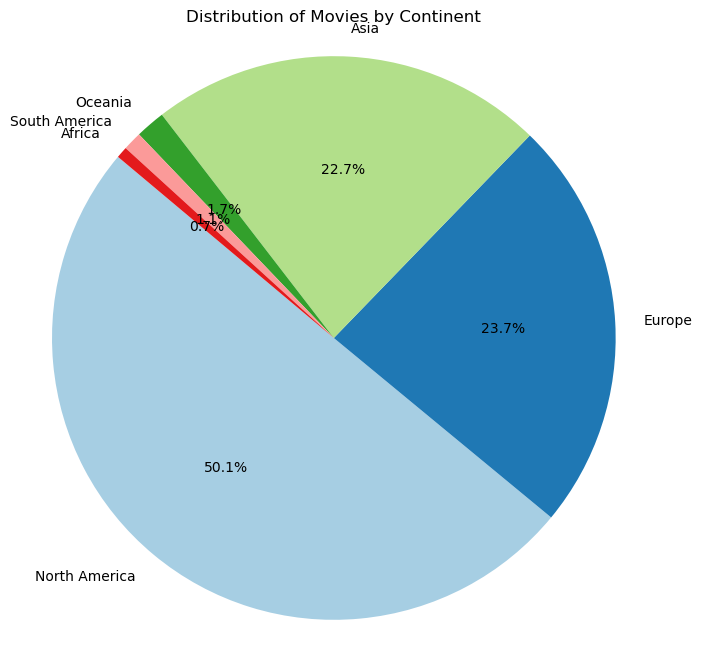

In [27]:
continent_counts = df_countries['continent'].explode().value_counts()
plt.figure(figsize=(8, 8))
plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Movies by Continent')
plt.axis('equal')
plt.show()

In [28]:
DATA_PATH = "../../../data/final_dataset.pkl"
df_extended = pd.read_pickle(DATA_PATH)
df_extended.set_index("Wikipedia_movie_ID", inplace=True)

In [29]:
import ast
#df_extended['category'] = df_extended['category'].dropna().apply(ast.literal_eval)

In [30]:
df_extended = df_extended.explode('category')
df_category_per_continent = df_extended.groupby(['continent', 'category']).size().reset_index(name='count')

In [31]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define a custom color palette
custom_colors = [
    "#a6cee3", "#1f78b4", "#b2df8a", "#33a02c",
    "#fb9a99", "#e31a1c", "#fdbf6f", "#ff7f00",
    "#cab2d6", "#6a3d9a", "#ffff99", "#b15928"
]

# Unique continents
continents = df_category_per_continent['continent'].unique()

# Determine number of rows and columns dynamically based on the number of continents
num_continents = len(continents)
num_rows = (num_continents + 1) // 2  # 2 columns, so divide by 2 and round up
num_cols = 2

# Create a subplot grid dynamically
fig = make_subplots(
    rows=num_rows, cols=num_cols,
    subplot_titles=[f"Distribution of Movies in {continent}" for continent in continents],
    specs=[[{'type': 'domain'} for _ in range(num_cols)] for _ in range(num_rows)]
)

# Iterate through continents and add pie charts
row, col = 1, 1
for continent_name in continents:
    continent = df_category_per_continent[df_category_per_continent['continent'] == continent_name].set_index('category')
    
    # Add pie chart for the current continent
    fig.add_trace(
        go.Pie(
            labels=continent.index,
            values=continent['count'],
            textinfo='percent+label',
            hoverinfo='label+percent',
            marker=dict(colors=custom_colors[:len(continent)])
        ),
        row=row, col=col
    )
    
    # Update row and column for the next chart
    col += 1
    if col > num_cols:
        col = 1
        row += 1

# Update layout
fig.update_layout(
    title_text="Distribution of Movies Per Continent",
    title_x=0.5,
    height=400 * num_rows,  # Adjust height dynamically
    width=800,
    showlegend=False
)

# Save and display the figure
fig.write_html("plot/dataset_presentation/distribution_of_movies_per_continent_subplots.html")
fig.show()


C:\Users\Mathieu\AppData\Local\Temp\ipykernel_47284\2912237411.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



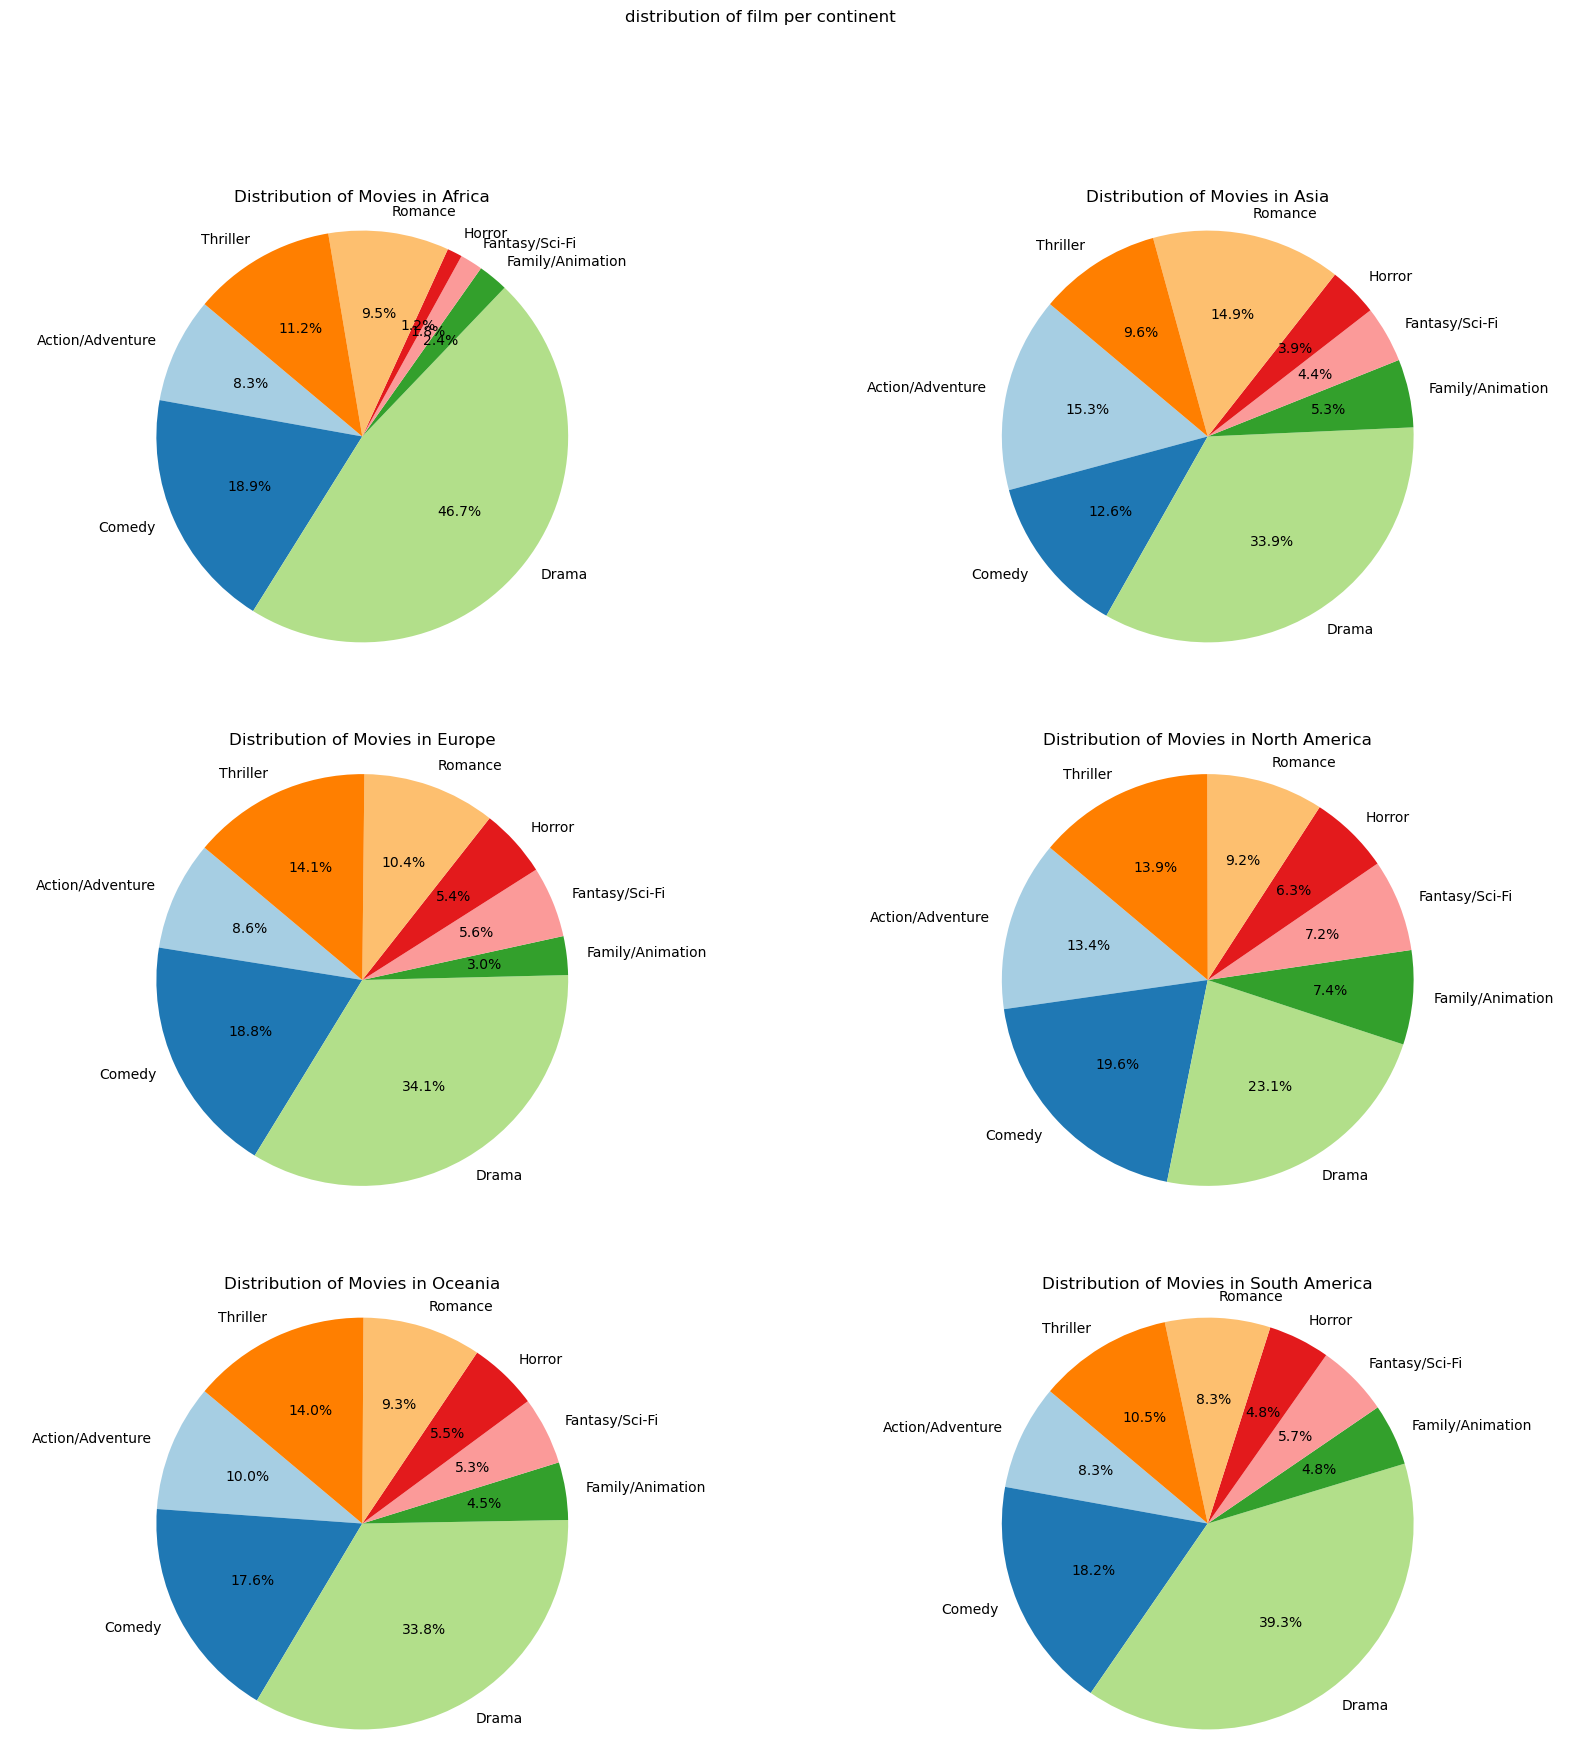

In [32]:
_, axes = plt.subplots(3, 2, figsize=(20, 20))
axes = axes.ravel()
for continent_name, ax in zip(df_category_per_continent['continent'].unique(), axes):
    continent = df_category_per_continent[df_category_per_continent['continent'] == continent_name].set_index('category')
    ax.pie(continent['count'], labels=continent.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    c = continent['continent'][0]
    ax.set_title(f'Distribution of Movies in {c}')
    ax.axis('equal')
plt.suptitle('distribution of film per continent')
plt.show()

### Adding the category and continent columns to our data

In [33]:
clean_df = pd.read_pickle(DATA_PATH)
print(clean_df.shape)
print(clean_df.columns)

(34342, 13)
Index(['Wikipedia_movie_ID', 'summary', 'Freebase_movie_ID', 'Movie_name',
       'Movie_release_date', 'Movie_box_office_revenue', 'Movie_runtime',
       'Movie_languages', 'Movie_countries', 'Movie_genres', 'category',
       'continent', 'Rating'],
      dtype='object')


In [34]:
category_joined = clean_df.merge(df_genre[['Wikipedia_movie_ID', 'category']], on='Wikipedia_movie_ID', how='outer')
print(category_joined.shape)
print(category_joined.columns)

(64043, 14)
Index(['Wikipedia_movie_ID', 'summary', 'Freebase_movie_ID', 'Movie_name',
       'Movie_release_date', 'Movie_box_office_revenue', 'Movie_runtime',
       'Movie_languages', 'Movie_countries', 'Movie_genres', 'category_x',
       'continent', 'Rating', 'category_y'],
      dtype='object')


In [35]:
continent_joined = category_joined.merge(df_countries[['Wikipedia_movie_ID', 'continent']], on='Wikipedia_movie_ID', how='outer')
print(continent_joined.shape)
print(continent_joined.columns)

(64043, 15)
Index(['Wikipedia_movie_ID', 'summary', 'Freebase_movie_ID', 'Movie_name',
       'Movie_release_date', 'Movie_box_office_revenue', 'Movie_runtime',
       'Movie_languages', 'Movie_countries', 'Movie_genres', 'category_x',
       'continent_x', 'Rating', 'category_y', 'continent_y'],
      dtype='object')


In [36]:
#continent_joined.to_csv('../../data/our_movie_data_extended.csv', index=False)
continent_joined.to_pickle('../../data/our_movie_data_extended.pkl')

### exploration of the ratings

In [4]:
PATH_ALL_SCRAPED = "../../../data/final_dataset.pkl"
df_all_scraped = pd.read_pickle(PATH_ALL_SCRAPED).drop('summary', axis=1)

In [5]:
columns_to_keep = ['Wikipedia_movie_ID', 'category', 'continent', 'Rating']
df = df_all_scraped[columns_to_keep]
ratings = df[['continent', 'category','Rating']]
ratings.dropna(inplace=True)
ratings.describe()

C:\Users\Mathieu\AppData\Local\Temp\ipykernel_16028\2574424277.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings.dropna(inplace=True)


,Rating
count,31886.000000
mean,6.261792
std,1.137202
min,1.000000
25%,5.600000
50%,6.400000
75%,7.000000
max,9.900000


In [7]:
import seaborn as sns

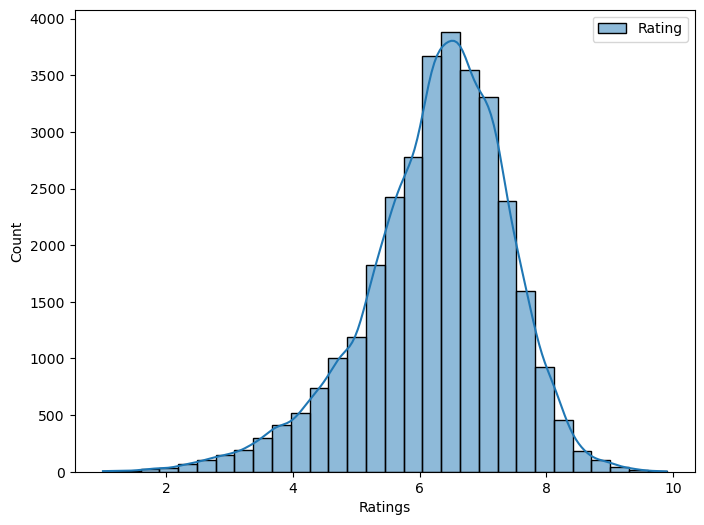

In [8]:
# histogram of the ratings, nothing crazy
plt.figure(figsize=(8, 6))
sns.histplot(ratings,  kde=True, bins=30)
plt.xlabel('Ratings')
plt.show()

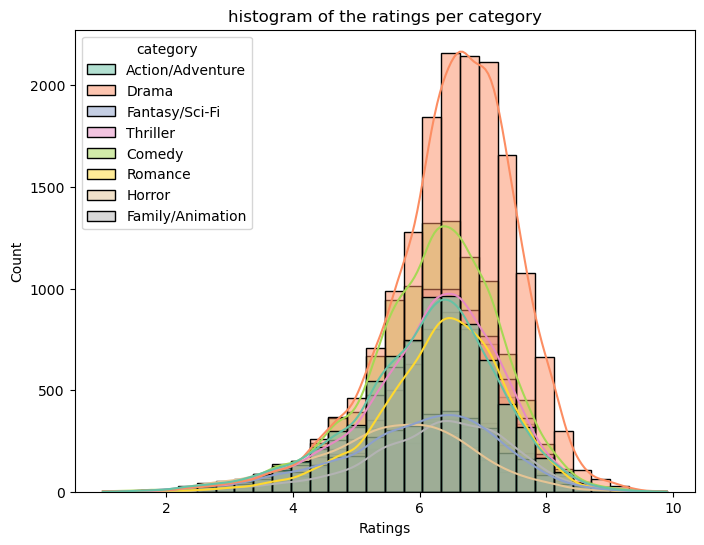

In [ ]:

plt.figure(figsize=(8, 6))
ratings_cat = df[['category', 'Rating']].explode('category').reset_index(drop=True)
sns.histplot(data=ratings_cat, x='Rating', hue='category', kde=True, bins=30, palette='Set2')
plt.xlabel('Ratings')
plt.title('histogram of the ratings per category')
plt.show()

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

genre_colors = {
    "Action/Adventure": "#6699FF",  # Soft Blue
    "Comedy": "#FFCC66",           # Soft Yellow/Orange
    "Drama": "#66CC99",            # Soft Teal
    "Family/Animation": "#FF9999", # Soft Coral/Red
    "Fantasy/Sci-Fi": "#CC99FF",   # Soft Lavender
    "Horror": "#996666",           # Muted Brown
    "Romance": "#FFB3CC",          # Soft Pink
    "Thriller": "#A9A9A9"          # Neutral Gray
}

fig = make_subplots(rows=1, cols=2, subplot_titles=("Overall ratings", "Ratings by category"))

# Histogramme simple (global)
fig.add_trace(
    go.Histogram(
        x=ratings.Rating, 
        nbinsx=60, 
        name='Overall Ratings',
        opacity=1,
        marker=dict(
            line=dict(color="black", width=1)  # Bordure noire avec une épaisseur de 1
        )
    ),
    row=1, col=1
)
    
category_sums = ratings_cat.groupby('category')['Rating'].sum().sort_values(ascending=False)
for category in category_sums.index:
    fig.add_trace(
        go.Histogram(
            x=ratings_cat[ratings_cat['category'] == category]['Rating'],
            name=category,
            nbinsx=60,
            marker=dict(
                color=genre_colors.get(category, "#808080"),
                line=dict(color="black", width=1)
            ),
            opacity=1,
            legendgroup=category,  
            showlegend=True        
        ),
        row=1, col=2
    )

# Mise en page de la figure
fig.update_layout(
    title_text='Histograms of ratings and categories ',
    xaxis_title='Ratings',
    yaxis_title='Count',
    barmode='stack',  
    width=1200, 
    height=500,
    template='plotly_white',
    hovermode='closest',
    legend=dict(
        yanchor="top",
        y=1,
        xanchor="left",
        x=1.02,
        font=dict(size=10),
        bordercolor="Black",
        borderwidth=1,
        itemsizing='constant',
        itemclick='toggle'  
    )
)
fig.write_html('plot/dataset_presentation/hist_ratings.html')
fig.show()